## 3. 正则化
- 正则化项不包括截距项
- 降低了模型的variance(降低方差，可预测性增加了)，但是增加了bias(增加bias，训练集中的误差增加了)
- 最好先对数据进行缩放，然后再分析，[StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut

In [8]:
data = np.array([[ -2.95507616,  10.94533252],
       [ -0.44226119,   2.96705822],
       [ -2.13294087,   6.57336839],
       [  1.84990823,   5.44244467],
       [  0.35139795,   2.83533936],
       [ -1.77443098,   5.6800407 ],
       [ -1.8657203 ,   6.34470814],
       [  1.61526823,   4.77833358],
       [ -2.38043687,   8.51887713],
       [ -1.40513866,   4.18262786]])
m = data.shape[0]  # 样本大小
X = data[:, 0].reshape(-1, 1)  # 将array转换成矩阵
y = data[:, 1].reshape(-1, 1)

### 3.1 手动添加正则化项L2(Ridge Regression)

In [30]:
# 代价函数
def L_theta(theta, X_x0, y, lamb):
    """
    lamb: lambda, the parameter of regularization
    theta: (n+1)·1 matrix, contains the parameter of x0=1
    X_x0: m·(n+1) matrix, plus x0
    """
    h = np.dot(X_x0, theta)  # np.dot 表示矩阵乘法
    theta_without_t0 = theta[1:]
    L_theta = 0.5 * mean_squared_error(h, y) + 0.5 * lamb * np.sum(np.square(theta_without_t0))
    return L_theta

In [31]:
# 梯度下降
def GD(lamb, X_x0, theta, y, alpha):
    """
    lamb: lambda, the parameter of regularization
    alpha: learning rate
    X_x0: m·(n+1), plus x0
    theta: (n+1)·1 matrix, contains the parameter of x0=1
    """
    for i in range(T):
        h = np.dot(X_x0, theta) # predict
        theta_with_t0_0 = np.r_[np.zeros([1, 1]), theta[1:]]  # set theta[0] = 0
        theta -= (alpha * 1/m * np.dot(X_x0.T, h - y) + lamb*(theta_with_t0_0))  # add the gradient of regularization term
        if i%50000==0:
            print(L_theta(theta, X_x0, y, lamb))
    return theta

#### 设置参数
- 迭代次数：T
- 学习率：alpha
- 正则化项参数：lamb

In [32]:
T = 1200000  # 迭代次数
degree = 11
theta = np.ones((degree + 1, 1))  # 参数的初始化，degree = 11，一个12个参数
alpha = 0.0000000006 # 学习率
# alpha = 0.003  # 学习率
lamb = 0.0001
# lamb = 0
poly_features_d = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_d = poly_features_d.fit_transform(X)
X_x0 = np.c_[np.ones((m, 1)), X_poly_d]  # ADD X0 = 1 to each instance
theta = GD(lamb=lamb, X_x0=X_x0, theta=theta, y=y, alpha=alpha)

185842996.998
3.38656920581
3.60036328489
3.60215580937
3.60203080711
3.60189636222
3.60176186746
3.60162737788
3.60149289383
3.60135841531
3.60122394233
3.60108947488
3.60095501296
3.60082055658
3.60068610573
3.60055166041
3.60041722062
3.60028278637
3.60014835764
3.60001393445
3.59987951679
3.59974510466
3.59961069806
3.59947629699


In [33]:
print(theta)
print(L_theta(theta, X_x0, y, lamb))

[[  1.00078848e+00]
 [ -1.03862735e-05]
 [  3.85144400e-05]
 [ -3.77233288e-05]
 [  1.28959318e-04]
 [ -1.42449160e-04]
 [  4.42760996e-04]
 [ -5.11518471e-04]
 [  1.42533716e-03]
 [ -1.40265037e-03]
 [  3.13638870e-03]
 [  1.21862016e-03]]
3.59934190413


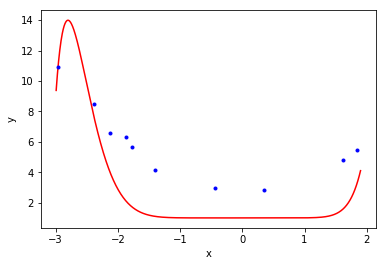

In [34]:
X_plot = np.linspace(-2.99, 1.9, 1000).reshape(-1, 1)
poly_features_d_with_bias = PolynomialFeatures(degree=degree, include_bias=True)
X_plot_poly = poly_features_d_with_bias.fit_transform(X_plot)
y_plot = np.dot(X_plot_poly, theta)
plt.plot(X_plot, y_plot, 'r-')
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('regu-3.1.png', dpi=200)
# plt.show()

添加正则化项后，模型变简单了。此时拟合训练集的效果不是太好，但是鉴于我们的原始数据来源于一个2次方程，因此可预测性提高了很多。

### 3.2 正规方程求解

In [35]:
theta2 = np.linalg.inv(np.dot(X_x0.T, X_x0) + 10*np.identity(X_x0.shape[1])).dot(X_x0.T).dot(y)
print(theta2)
print(L_theta(theta2, X_x0, y, lamb))

[[ 0.56502653]
 [-0.12459546]
 [ 0.26772443]
 [-0.15642405]
 [ 0.29249514]
 [-0.10084392]
 [ 0.22791769]
 [ 0.1648667 ]
 [-0.05686718]
 [-0.03906615]
 [-0.00111673]
 [ 0.00101724]]
0.604428719639


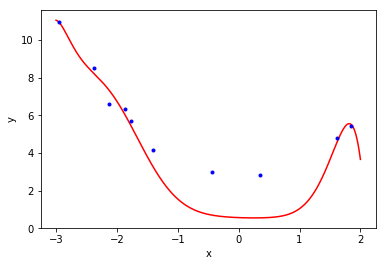

In [37]:
X_plot = np.linspace(-3, 2, 1000).reshape(-1, 1)
poly_features_d_with_bias = PolynomialFeatures(degree=degree, include_bias=True)
X_plot_poly = poly_features_d_with_bias.fit_transform(X_plot)
y_plot = np.dot(X_plot_poly, theta2)
plt.plot(X_plot, y_plot, 'r-')
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('regu-3.2.png', dpi=200)
# plt.show()

### 3.3 手动添加正则化项L1(Lasso Regression)

In [876]:
# 代价函数
def L_theta(theta, X_x0, y, lamb):
    """
    lamb: lambda, the parameter of regularization
    theta: (n+1)·1 matrix, contains the parameter of x0=1
    X_x0: m·(n+1) matrix, plus x0
    """
    h = np.dot(X_x0, theta) # np.dot 表示矩阵乘法
    theta_without_t0 = theta[1:]
    L_theta = mean_squared_error(h, y) + lamb * np.sum(np.abs(theta_without_t0))
    return L_theta

In [877]:
# 梯度下降
def GD(lamb, X_x0, theta, h, y, alpha):
    """
    lamb: lambda, the parameter of regularization
    alpha: learning rate
    X_x0: m·(n+1), plus x0
    theta: (n+1)·1 matrix, contains the parameter of x0=1
    """
    for i in range(T):
        h = np.dot(X_x0, theta)
        theta_with_t0_0 = np.r_[np.zeros([1, 1]), theta[1:]]  # set theta[0] = 0
        theta -= (alpha * 1/m * np.dot(X_x0.T, h - y) + 2*lamb*(np.sign(theta_with_t0_0)))  # add the gradient of regularization term
        if i%1000==0:
            print(L_theta(theta, X_x0, y, lamb))
    return theta

In [929]:
T = 10000  # 迭代次数
degree = 11
theta = np.ones((degree + 1, 1))  # 参数的初始化，degree = 11，一个12个参数
alpha = 0.00000000009  # 学习率
# alpha = 0.00006  # 学习率
lamb = 0.00009
poly_features_d = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_d = poly_features_d.fit_transform(X)
# lamb = 0
X_x0 = np.c_[np.ones((m, 1)), X_poly_d]  # ADD X0 = 1 to each instance

In [930]:
theta = GD(lamb=lamb, X_x0=X_x0, theta=theta, h=h, y=y, alpha=alpha)
print(theta)

749348967.791
205317.994438
118395.995939
56407.4911963
17971.8244177
1788.27567206
22.8504300638
55.2227452403
33.1061171937
68.7172587622
[[  9.99926898e-01]
 [ -9.02603623e-05]
 [ -3.94988704e-06]
 [ -1.70848639e-05]
 [ -1.26466490e-04]
 [  1.41393831e-04]
 [ -1.24488885e-04]
 [  1.42423825e-04]
 [ -1.36769090e-04]
 [ -1.58975955e-04]
 [ -1.40245800e-04]
 [ -1.82004406e-04]]


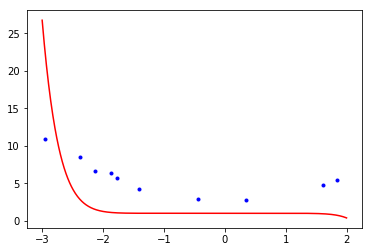

In [932]:
X_plot = np.linspace(-3, 2, 1000).reshape(-1, 1)
poly_features_d_with_bias = PolynomialFeatures(degree=degree, include_bias=True)
X_plot_poly = poly_features_d_with_bias.fit_transform(X_plot)
h = np.dot(X_plot_poly, theta)
plt.plot(X_plot, h, 'r-')
plt.plot(X, y, 'b.')
# plt.axis([0, 2, 4, 12])
plt.savefig('regu-5.png', dpi=200)

相对于L2，L1得到的模型更简单，例如从[-1, 1]，模型几乎为一条直线

### 3.4 使用scikit-learn

#### 3.4.1 Ridge

In [38]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [93]:
# 代价函数
def L_theta_ridge(intercept, coef, X, y, lamb):
    """
    lamb: lambda, the parameter of regularization
    theta: (n+1)·1 matrix, contains the parameter of x0=1
    X_x0: m·(n+1) matrix, plus x0
    """
    h = np.dot(X, coef) + intercept  # np.dot 表示矩阵乘法
    L_theta = 0.5 * mean_squared_error(h, y) + 0.5 * lamb * np.sum(np.square(coef))
    return L_theta

In [50]:
lamb = 10
ridge_reg = Ridge(alpha=lamb, solver="cholesky")
ridge_reg.fit(X_poly_d, y)
print(ridge_reg.intercept_, ridge_reg.coef_)
print(L_theta_new(intercept=ridge_reg.intercept_, coef=ridge_reg.coef_.T, X=X_poly_d, y=y, lamb=lamb))

[ 3.03698398] [[ -2.95619849e-02   6.09137803e-02  -4.93919290e-02   1.10593684e-01
   -4.65660197e-02   1.06387336e-01   5.14340826e-02  -2.29460359e-02
   -1.12705709e-02  -1.73925386e-05   2.79198986e-04]]
0.213877232488


In [52]:
ridge_reg.score(X_poly_d, y)  # R^2

0.98783701716852146

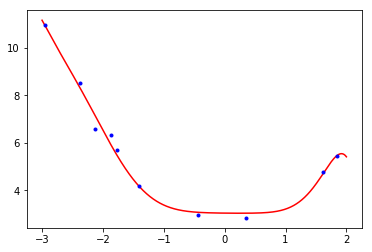

In [53]:
X_plot = np.linspace(-3, 2, 1000).reshape(-1, 1)
X_plot_poly = poly_features_d.fit_transform(X_plot)
h = np.dot(X_plot_poly, ridge_reg.coef_.T) + ridge_reg.intercept_
plt.plot(X_plot, h, 'r-')
plt.plot(X, y, 'b.')
# plt.show()
plt.savefig('regu-3.4-1.png', dpi=200)

#### 3.4.2 Lasso

In [96]:
# 代价函数
def L_theta_lasso(intercept, coef, X, y, lamb):
    """
    lamb: lambda, the parameter of regularization
    theta: (n+1)·1 matrix, contains the parameter of x0=1
    X_x0: m·(n+1) matrix, plus x0
    """
    h = np.dot(X, coef) + intercept  # np.dot 表示矩阵乘法
    L_theta = 0.5 * mean_squared_error(h, y) + lamb * np.sum(np.abs(coef))
    return L_theta

In [97]:
lamb = 0.025
lasso_reg = Lasso(alpha=lamb)
lasso_reg.fit(X_poly_d, y)
print(lasso_reg.intercept_, lasso_reg.coef_)
print(L_theta_lasso(intercept=lasso_reg.intercept_, coef=lasso_reg.coef_.T, X=X_poly_d, y=y, lamb=lamb))

[ 2.86435179] [ -0.00000000e+00   5.29099723e-01  -3.61182017e-02   9.75614738e-02
   1.61971116e-03  -3.42711766e-03   2.78782527e-04  -1.63421713e-04
  -5.64291215e-06  -1.38933655e-05   1.02036898e-06]
0.0451291096773


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


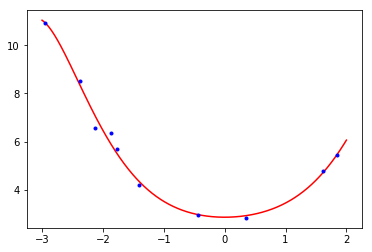

In [57]:
X_plot = np.linspace(-3, 2, 1000).reshape(-1, 1)
X_plot_poly = poly_features_d.fit_transform(X_plot)
h = np.dot(X_plot_poly, lasso_reg.coef_.T) + lasso_reg.intercept_
plt.plot(X_plot, h, 'r-')
plt.plot(X, y, 'b.')
# plt.show()
plt.savefig('regu-3.4-2.png', dpi=200)

#### 3.4.3 Elastic Net

In [98]:
# 代价函数
def L_theta_ee(intercept, coef, X, y, lamb, r):
    """
    lamb: lambda, the parameter of regularization
    theta: (n+1)·1 matrix, contains the parameter of x0=1
    X_x0: m·(n+1) matrix, plus x0
    """
    h = np.dot(X, coef) + intercept  # np.dot 表示矩阵乘法
    L_theta = 0.5 * mean_squared_error(h, y) + r * lamb * np.sum(np.abs(coef)) + 0.5 * (1-r) * lamb * np.sum(np.square(coef))
    return L_theta

In [99]:
from sklearn.linear_model import ElasticNet

In [106]:
elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.8)
elastic_net.fit(X_poly_d, y)
print(elastic_net.intercept_, elastic_net.coef_)
print(L_theta_ee(intercept=elastic_net.intercept_, coef=elastic_net.coef_.T, X=X_poly_d, y=y, lamb=0.1, r=0.8))

[ 3.31466833] [ -0.00000000e+00   0.00000000e+00  -0.00000000e+00   1.99874040e-01
  -1.21830209e-02   2.58040545e-04   3.01117857e-03  -8.54952421e-04
   4.35227606e-05  -2.84995639e-06  -8.36248799e-06]
0.0807738447192


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


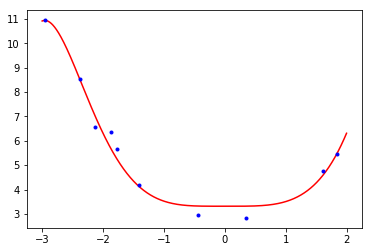

In [107]:
X_plot = np.linspace(-3, 2, 1000).reshape(-1, 1)
X_plot_poly = poly_features_d.fit_transform(X_plot)
h = np.dot(X_plot_poly, elastic_net.coef_.T) + elastic_net.intercept_
plt.plot(X_plot, h, 'r-')
plt.plot(X, y, 'b.')
# plt.show()
plt.savefig('regu-3.4-3.png', dpi=200)

### 4. 使用交叉验证选择正则化的参数
- 使用Leave One Out进行交叉验证

#### 4.1 挑选L2正则化参数

In [902]:
def get_total_loss(X, y, lamb, degree):
    loo = LeaveOneOut()
    loss = []
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    train_poly = poly_features.fit_transform(X)
    for train, test in loo.split(X):  # 利用LOO拆分训练样本和测试样本
#         print("%s %s" % (train, test))
        ridge_reg = Ridge(alpha=lamb, solver="cholesky")
        ridge_reg.fit(train_poly[train], y[train])  # ridge regression training
        loss.append(ridge_reg.predict(train_poly[test]) - y[test])  # save all loss for each test
    return 1/(len(loss)) * np.sum(np.square(np.array(loss)))  # use MSE function to return the total loss

In [903]:
get_total_loss(X, y, 10, 6)

0.20734111419908241

In [904]:
lamb_range = np.geomspace(1e-6, 1e4, 10, endpoint=False)
lamb_range

array([  1.00000000e-06,   1.00000000e-05,   1.00000000e-04,
         1.00000000e-03,   1.00000000e-02,   1.00000000e-01,
         1.00000000e+00,   1.00000000e+01,   1.00000000e+02,
         1.00000000e+03])

In [905]:
loss_score = []
for lamb in lamb_range:
    loss = get_total_loss(X, y, lamb, 6)
    loss_score.append(loss)
loss_score

[1.5183585550198837,
 1.5174863694989424,
 1.5088751387170132,
 1.432389199452542,
 1.0566184322679464,
 0.38337321838953636,
 0.38431055801814185,
 0.20734111419908241,
 6.2808412958114737,
 11.94121193348386]

In [906]:
np.argmin(np.array(loss_score))

7

#### 精选

In [690]:
lamb_range = np.linspace(1, 2, 20, endpoint=False)
lamb_range

array([ 1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,  1.35,  1.4 ,
        1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,  1.8 ,  1.85,
        1.9 ,  1.95])

In [691]:
loss_score = []
for lamb in lamb_range:
    loss = get_total_loss(X, y, lamb, 6)
    loss_score.append(loss)
loss_score

[2.2905174737627618,
 1.934283047610694,
 1.6304663747425003,
 1.3718151129634721,
 1.1522541593829139,
 0.9666635430804954,
 0.81070395425828501,
 0.68067850765112392,
 0.57342234048114071,
 0.48621378764122547,
 0.41670242492888532,
 0.36285040236193611,
 0.32288432524091998,
 0.29525556373908429,
 0.27860734080268107,
 0.27174730412942932,
 0.27362456030731847,
 0.28331035911669888,
 0.29998177891211963,
 0.32290789129722297]

#### 4.2 挑选L1的参数

In [916]:
def get_total_loss_l1(X, y, lamb, degree):
    loo = LeaveOneOut()
    loss = []
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    train_poly = poly_features.fit_transform(X)
    for train, test in loo.split(X):  # 利用LOO拆分训练样本和测试样本
#         print("%s %s" % (train, test))
        lasso_reg = Lasso(alpha=lamb)
        lasso_reg.fit(train_poly[train], y[train])  # ridge regression training
        loss.append(lasso_reg.predict(train_poly[test]) - y[test])  # save all loss for each test
    return 1/(len(loss)) * np.sum(np.square(np.array(loss)))  # use MSE function to return the total loss

In [917]:
lamb_range = np.geomspace(1e-6, 1e4, 10, endpoint=False)
lamb_range

array([  1.00000000e-06,   1.00000000e-05,   1.00000000e-04,
         1.00000000e-03,   1.00000000e-02,   1.00000000e-01,
         1.00000000e+00,   1.00000000e+01,   1.00000000e+02,
         1.00000000e+03])

In [918]:
loss_score = []
for lamb in lamb_range:
    loss = get_total_loss_l1(X, y, lamb, 6)
    loss_score.append(loss)
loss_score

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[0.67931591680858827,
 0.67828075296154455,
 0.66781265655340516,
 0.59322280603933908,
 0.32091856131286489,
 0.75478492986359247,
 3.9600861112079779,
 10.821291876957668,
 5.2700232844772898,
 6.8359331621592165]

In [919]:
lamb_range = np.geomspace(1e-2, 1, 20, endpoint=False)
lamb_range

array([ 0.01      ,  0.01258925,  0.01584893,  0.01995262,  0.02511886,
        0.03162278,  0.03981072,  0.05011872,  0.06309573,  0.07943282,
        0.1       ,  0.12589254,  0.15848932,  0.19952623,  0.25118864,
        0.31622777,  0.39810717,  0.50118723,  0.63095734,  0.79432823])

In [920]:
loss_score = []
for lamb in lamb_range:
    loss = get_total_loss_l1(X, y, lamb, 6)
    loss_score.append(loss)
loss_score

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[0.32091856131286489,
 0.26712344354262701,
 0.2148091515283114,
 0.17164748026659149,
 0.15411982575240529,
 0.19180815393858577,
 0.33453165853241357,
 0.66714524605167158,
 1.0269416556179658,
 0.90840916385077319,
 0.75478492986359247,
 0.56562881062750736,
 0.37517017160528787,
 0.22598188066724614,
 0.17847367378053763,
 0.31471733247887235,
 0.79947447220327261,
 1.6364238206440611,
 2.6640736861565006,
 2.588707556527523]

In [921]:
np.argmin(loss_score)

4

#### 4.3 挑选ElasticNet的参数

In [70]:
def get_total_loss_elasticnet(X, y, lamb, degree, l1_ratio):
    loo = LeaveOneOut()
    loss = []
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    train_poly = poly_features.fit_transform(X)
    for train, test in loo.split(X):  # 利用LOO拆分训练样本和测试样本
#         print("%s %s" % (train, test))
        ee_reg = ElasticNet(alpha=lamb, l1_ratio=l1_ratio)
        ee_reg.fit(train_poly[train], y[train])  # ridge regression training
        loss.append(ee_reg.predict(train_poly[test]) - y[test])  # save all loss for each test
    return 1/(len(loss)) * np.sum(np.square(np.array(loss)))  # use MSE function to return the total loss

In [71]:
lamb_range = np.geomspace(1e-6, 1e6, 12, endpoint=False)
lamb_range

array([  1.00000000e-06,   1.00000000e-05,   1.00000000e-04,
         1.00000000e-03,   1.00000000e-02,   1.00000000e-01,
         1.00000000e+00,   1.00000000e+01,   1.00000000e+02,
         1.00000000e+03,   1.00000000e+04,   1.00000000e+05])

In [75]:
loss_score = []
l1_ration = np.linspace(0, 1, 10, endpoint=False)
for lamb in lamb_range:
    for l1_r in l1_ration:
        loss = get_total_loss_elasticnet(X, y, lamb, 11, l1_r)
        loss_score.append(loss)
loss_score

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[52.396354655999268,
 52.396309979336287,
 52.396265302788734,
 52.39622062635614,
 52.396175950035435,
 52.3961312738262,
 52.396086597731795,
 52.396041921754865,
 52.395997245893483,
 52.395952570142349,
 52.408222078577921,
 52.407774162516802,
 52.40732625396214,
 52.406878358656108,
 52.406430467189381,
 52.405982589138574,
 52.405534623975555,
 52.405086750646696,
 52.404638884597595,
 52.404191027318873,
 52.526675700588875,
 52.522068316216668,
 52.51745479769167,
 52.51288480410733,
 52.508287943190012,
 52.503687966992892,
 52.499094045592031,
 52.494501331037512,
 52.490013152127837,
 52.485434534369531,
 53.689298926242863,
 53.624750995960291,
 53.563011401770098,
 53.513473234005886,
 53.464109668468886,
 53.416424287959984,
 53.367215240997524,
 53.318892300384029,
 53.270557429335874,
 53.222425416870806,
 63.29624303417944,
 62.832563914491203,
 62.358406767113991,
 61.885362479642794,
 61.418607640254493,
 60.966175522707083,
 60.530613498752899,
 60.065417735355766,

In [76]:
np.argmin(loss_score)

64

In [77]:
loss_score[64]

0.34712648686573572

### Reference

- http://enhancedatascience.com/2017/07/04/machine-learning-explained-regularization/
- https://www.youtube.com/watch?v=TmzzQoO8mr4 (cost函数的作用，L1与L2的解，L1的解不稳定)